Predicted labels:  [0 1 1 1 0 1 0 1 0 1]
Real labels:  [0 1 1 1 0 0 0 1 0 0]
Trained W:  [0.40750316]
Trained b:  -1.503884153509855


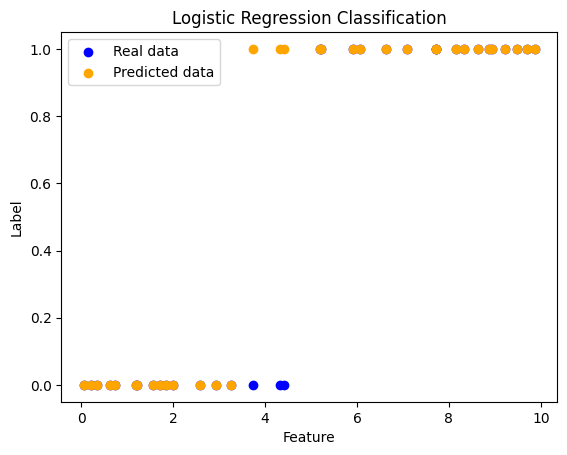

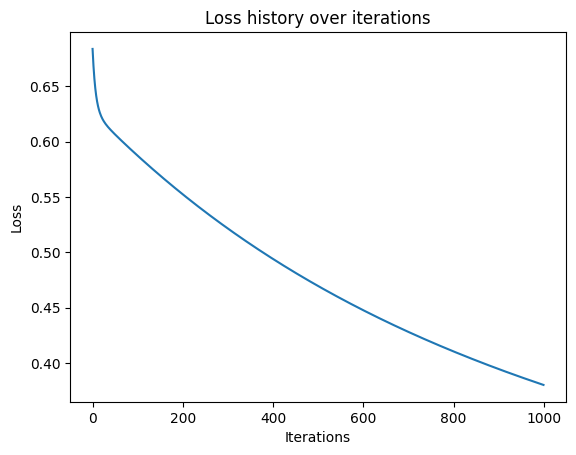

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate random data
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # Features
y = (X > 5).astype(int).ravel()  # Labels: 1 if X > 5 else 0

class LogisticRegression:
    """
    A simple logistic regression model using gradient descent.

    Attributes:
        learning_rate (float): The learning rate for gradient descent.
        iterations (int): The number of iterations for gradient descent.
        W (numpy.ndarray): Weights of the model.
        b (float): Bias term of the model.
        loss_history (list): History of the loss function value during training.
    """
    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Initializes the LogisticRegression model with learning rate and iterations.

        Parameters:
            learning_rate (float): The learning rate for gradient descent.
            iterations (int): The number of iterations for gradient descent.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        """
        Computes the sigmoid function.

        Parameters:
            z (numpy.ndarray): The input value.

        Returns:
            numpy.ndarray: The output of the sigmoid function.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Trains the LogisticRegression model using the training data.

        Parameters:
            X (numpy.ndarray): The input features of shape (m, n).
            y (numpy.ndarray): The target values of shape (m,).

        Returns:
            self: The fitted model.
        """
        self.m, self.n = X.shape

        # Initialize weights
        self.W = np.zeros(self.n)
        self.b = 0

        self.X = X
        self.y = y
        self.loss_history = []

        # Gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
            # Compute loss for tracking
            loss = self.compute_loss()
            self.loss_history.append(loss)

        return self

    def update_weights(self):
        """
        Updates the weights and bias using gradient descent.
        """
        y_pred = self.sigmoid(np.dot(self.X, self.W) + self.b)

        # Calculate gradients
        dW = (1 / self.m) * np.dot(self.X.T, (y_pred - self.y))
        db = (1 / self.m) * np.sum(y_pred - self.y)

        # Update weights
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

        return self

    def compute_loss(self):
        """
        Computes the loss function (log loss).

        Returns:
            float: The value of the loss function.
        """
        y_pred = self.sigmoid(np.dot(self.X, self.W) + self.b)
        loss = - (1 / self.m) * np.sum(self.y * np.log(y_pred) + (1 - self.y) * np.log(1 - y_pred))
        return loss

    def predict_proba(self, X):
        """
        Predicts the probabilities for given input features.

        Parameters:
            X (numpy.ndarray): The input features.

        Returns:
            numpy.ndarray: The predicted probabilities.
        """
        return self.sigmoid(np.dot(X, self.W) + self.b)

    def predict(self, X):
        """
        Predicts the class labels for given input features.

        Parameters:
            X (numpy.ndarray): The input features.

        Returns:
            numpy.ndarray: The predicted class labels.
        """
        return (self.predict_proba(X) >= 0.5).astype(int)

    def plot_loss_history(self):
        """
        Plots the history of the loss function value over iterations.
        """
        plt.plot(range(self.iterations), self.loss_history)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss history over iterations')
        plt.show()

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Model training
model = LogisticRegression(iterations=1000, learning_rate=0.01)
model.fit(X_train, y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Print results
print("Predicted labels: ", y_pred[:10])
print("Real labels: ", y_test[:10])
print("Trained W: ", model.W)
print("Trained b: ", model.b)

# Visualization on test set
plt.scatter(X_test, y_test, color='blue', label='Real data')
plt.scatter(X_test, y_pred, color='orange', label='Predicted data')
plt.title('Logistic Regression Classification')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.legend()
plt.show()

# Plot loss history
model.plot_loss_history()
